In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler,LabelEncoder
from sklearn.impute import IterativeImputer,KNNImputer,SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, mean_absolute_error

from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [139]:
df = pd.read_csv("vacation_preferences_data.csv")

In [140]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0


In [141]:
df["Income"].apply(type).value_counts()

Income
<class 'int'>    52444
Name: count, dtype: int64

In [142]:
df['Income category'] = df['Income'].apply(lambda x: 'low' if x<50000 else ('mid' if x < 90000 else 'high'))

In [143]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Income category
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1,mid
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0,mid
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1,low
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1,high
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0,high


In [144]:
df.isnull().sum()

Age                       5244
Gender                       0
Income                       0
Education_Level           2622
Travel_Frequency             0
Preferred_Activities         0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
Income category              0
dtype: int64

In [145]:
ordinal_encoder = OrdinalEncoder(
    categories=[["low", "mid", "high"]],
)

In [146]:
df[["Income category"]] = ordinal_encoder.fit_transform(df[["Income category"]])

In [147]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Income category
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1,1.0
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0,1.0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1,0.0
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1,2.0
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0,2.0


In [148]:
df["Gender"].unique()

array(['male', 'female', 'non-binary'], dtype=object)

In [149]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [150]:
label_encoder.classes_

array(['female', 'male', 'non-binary'], dtype=object)

In [151]:
df["Education_Level"].unique()

array(['bachelor', 'master', 'high school', 'doctorate', nan],
      dtype=object)

In [152]:
ordinal_encoder = OrdinalEncoder(
    categories=[["high school", "bachelor", "master","doctorate"]],
    handle_unknown="use_encoded_value",
    unknown_value=np.nan,
)
df[["Education_Level"]] = ordinal_encoder.fit_transform(df[["Education_Level"]])

In [153]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,Income category
0,56.0,1,71477,1.0,9,skiing,2477,urban,175.0,267,summer,0,1,1,1.0
1,69.0,1,88740,2.0,1,swimming,4777,suburban,NaN,190,fall,0,1,0,1.0
2,46.0,0,46562,2.0,0,skiing,1469,urban,71.0,280,winter,0,0,1,0.0
3,32.0,2,99044,0.0,6,hiking,1482,rural,31.0,255,summer,1,0,1,2.0
4,60.0,0,106583,0.0,5,sunbathing,516,suburban,23.0,151,winter,1,1,0,2.0


In [154]:
df["Preferred_Activities"].unique()

array(['skiing', 'swimming', 'hiking', 'sunbathing'], dtype=object)

In [155]:
grouped_data = df.groupby(by=['Preferred_Activities', 'Favorite_Season']).size().reset_index(name='count')
grouped_data

,Preferred_Activities,Favorite_Season,count
0,hiking,fall,3253
1,hiking,spring,3269
2,hiking,summer,3300
3,hiking,winter,3280
4,skiing,fall,3361
5,skiing,spring,3250
6,skiing,summer,3331
7,skiing,winter,3225
8,sunbathing,fall,3302
9,sunbathing,spring,3217


In [156]:
df["Location"].value_counts()

Location
suburban    17503
urban       17476
rural       17465
Name: count, dtype: int64

In [157]:
#Preferred_Activities ne vlijae mnogu vrz Favorite_Season.

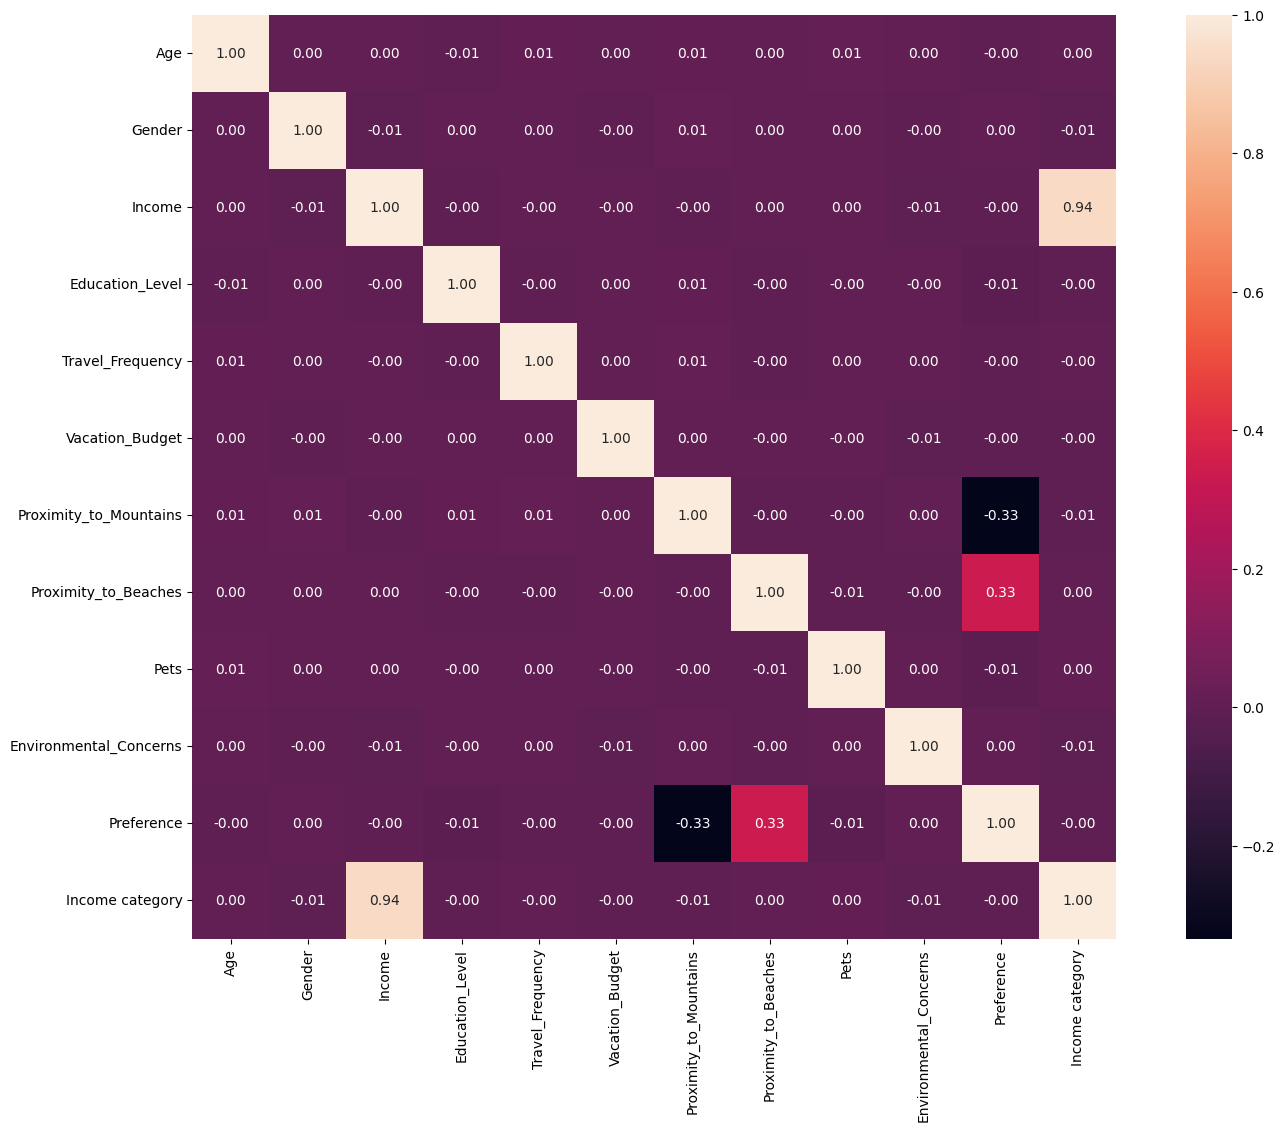

In [159]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)
plt.show()

<Axes: >

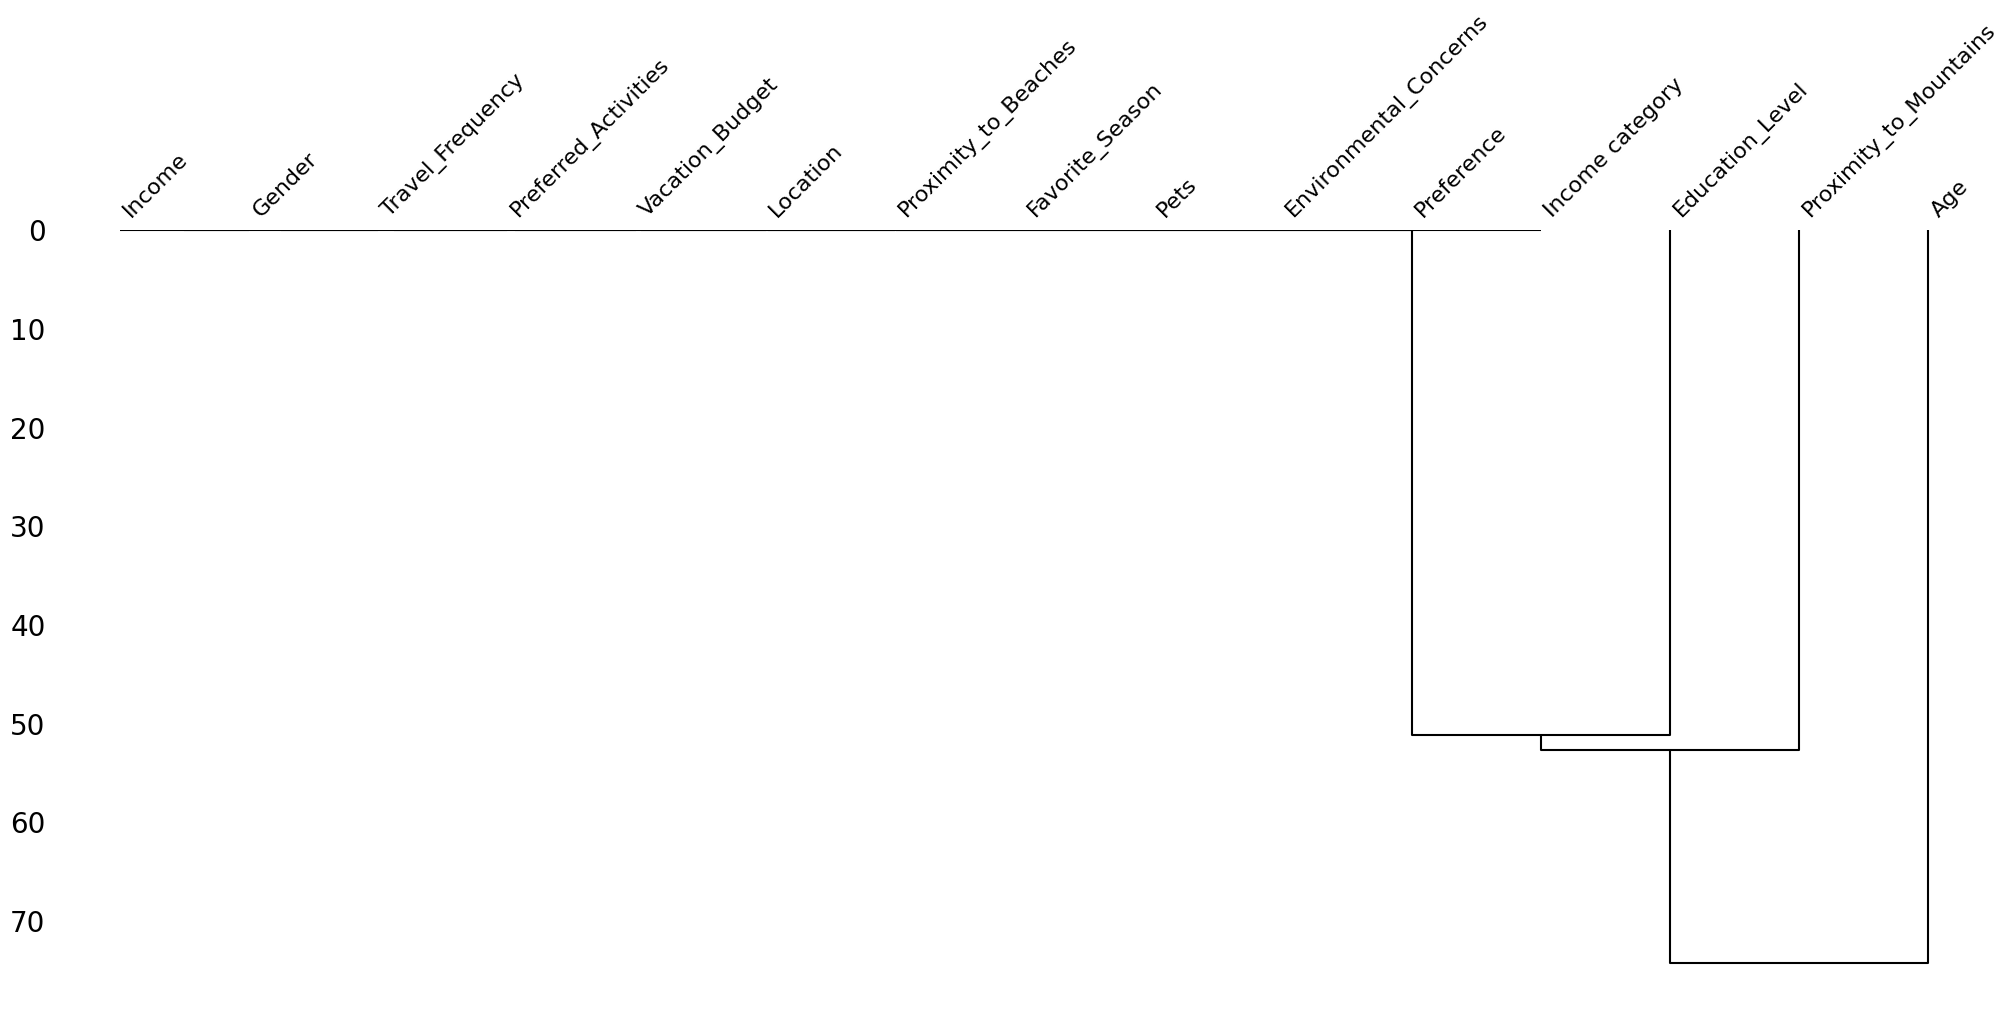

In [160]:
msno.dendrogram(df)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     47200 non-null  float64
 1   Gender                  52444 non-null  int64  
 2   Income                  52444 non-null  int64  
 3   Education_Level         49822 non-null  float64
 4   Travel_Frequency        52444 non-null  int64  
 5   Preferred_Activities    52444 non-null  object 
 6   Vacation_Budget         52444 non-null  int64  
 7   Location                52444 non-null  object 
 8   Proximity_to_Mountains  49822 non-null  float64
 9   Proximity_to_Beaches    52444 non-null  int64  
 10  Favorite_Season         52444 non-null  object 
 11  Pets                    52444 non-null  int64  
 12  Environmental_Concerns  52444 non-null  int64  
 13  Preference              52444 non-null  int64  
 14  Income category         52444 non-null

In [162]:
df.drop(columns=["Favorite_Season"], inplace=True)

In [163]:
df = pd.concat([df, pd.get_dummies(df["Preferred_Activities"])], axis=1)
df.drop(columns=["Preferred_Activities"], inplace=True)

In [164]:
df["Location"].unique()

array(['urban', 'suburban', 'rural'], dtype=object)

In [165]:
df = pd.concat([df, pd.get_dummies(df["Location"])], axis=1)
df.drop(columns=["Location"], inplace=True)

In [166]:
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference,Income category,hiking,skiing,sunbathing,swimming,rural,suburban,urban
0,56.0,1,71477,1.0,9,2477,175.0,267,0,1,1,1.0,False,True,False,False,False,False,True
1,69.0,1,88740,2.0,1,4777,NaN,190,0,1,0,1.0,False,False,False,True,False,True,False
2,46.0,0,46562,2.0,0,1469,71.0,280,0,0,1,0.0,False,True,False,False,False,False,True
3,32.0,2,99044,0.0,6,1482,31.0,255,1,0,1,2.0,True,False,False,False,True,False,False
4,60.0,0,106583,0.0,5,516,23.0,151,1,1,0,2.0,False,False,True,False,False,True,False


In [167]:
df.isnull().sum()

Age                       5244
Gender                       0
Income                       0
Education_Level           2622
Travel_Frequency             0
Vacation_Budget              0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Pets                         0
Environmental_Concerns       0
Preference                   0
Income category              0
hiking                       0
skiing                       0
sunbathing                   0
swimming                     0
rural                        0
suburban                     0
urban                        0
dtype: int64

<Axes: >

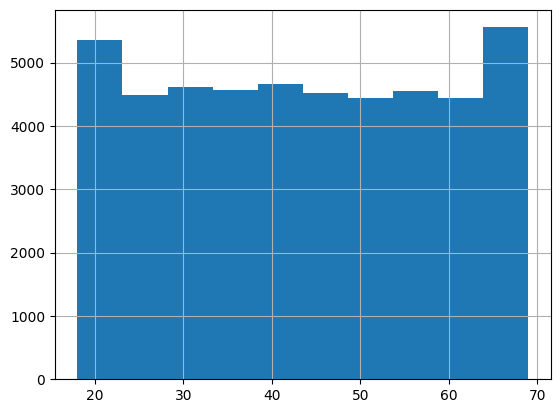

In [168]:

df["Age"].hist()

<Axes: >

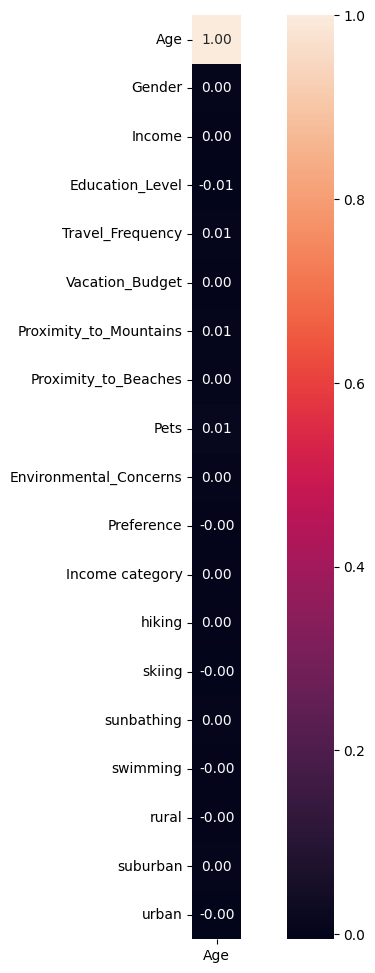

In [169]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True)[["Age"]], annot=True, fmt=".2f", square=True)

<Axes: >

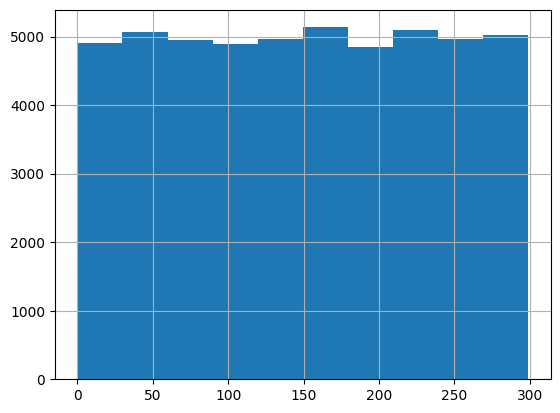

In [170]:
df["Proximity_to_Mountains"].hist()

<Axes: >

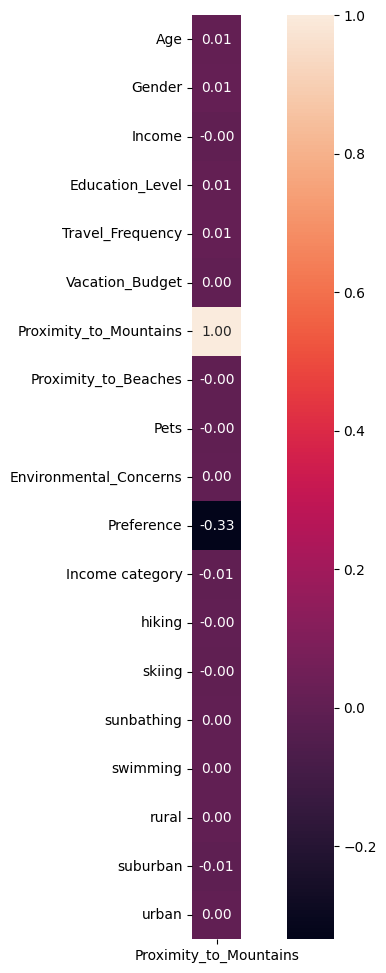

In [171]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True)[["Proximity_to_Mountains"]], annot=True, fmt=".2f", square=True)

In [172]:
cols = ["Proximity_to_Mountains", "Preference"]
iterative_imputer = IterativeImputer()
df[cols] = iterative_imputer.fit_transform(df[cols])

<Axes: >

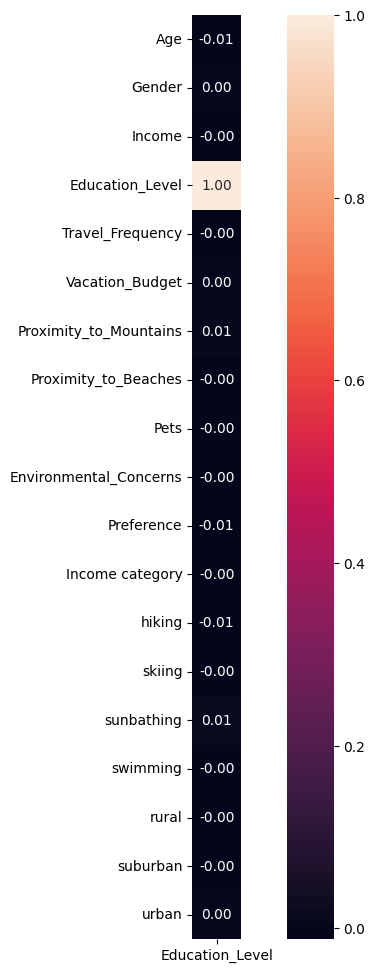

In [173]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True)[["Education_Level"]], annot=True, fmt=".2f", square=True)

In [174]:
knn_imputer = KNNImputer(n_neighbors=7)
df[['Education_Level']] = knn_imputer.fit_transform(df[['Education_Level']])

In [175]:
df.isnull().sum()

Age                       5244
Gender                       0
Income                       0
Education_Level              0
Travel_Frequency             0
Vacation_Budget              0
Proximity_to_Mountains       0
Proximity_to_Beaches         0
Pets                         0
Environmental_Concerns       0
Preference                   0
Income category              0
hiking                       0
skiing                       0
sunbathing                   0
swimming                     0
rural                        0
suburban                     0
urban                        0
dtype: int64

In [176]:
median_imputer = SimpleImputer(strategy="median")
df[['Age']] = median_imputer.fit_transform(df[['Age']])

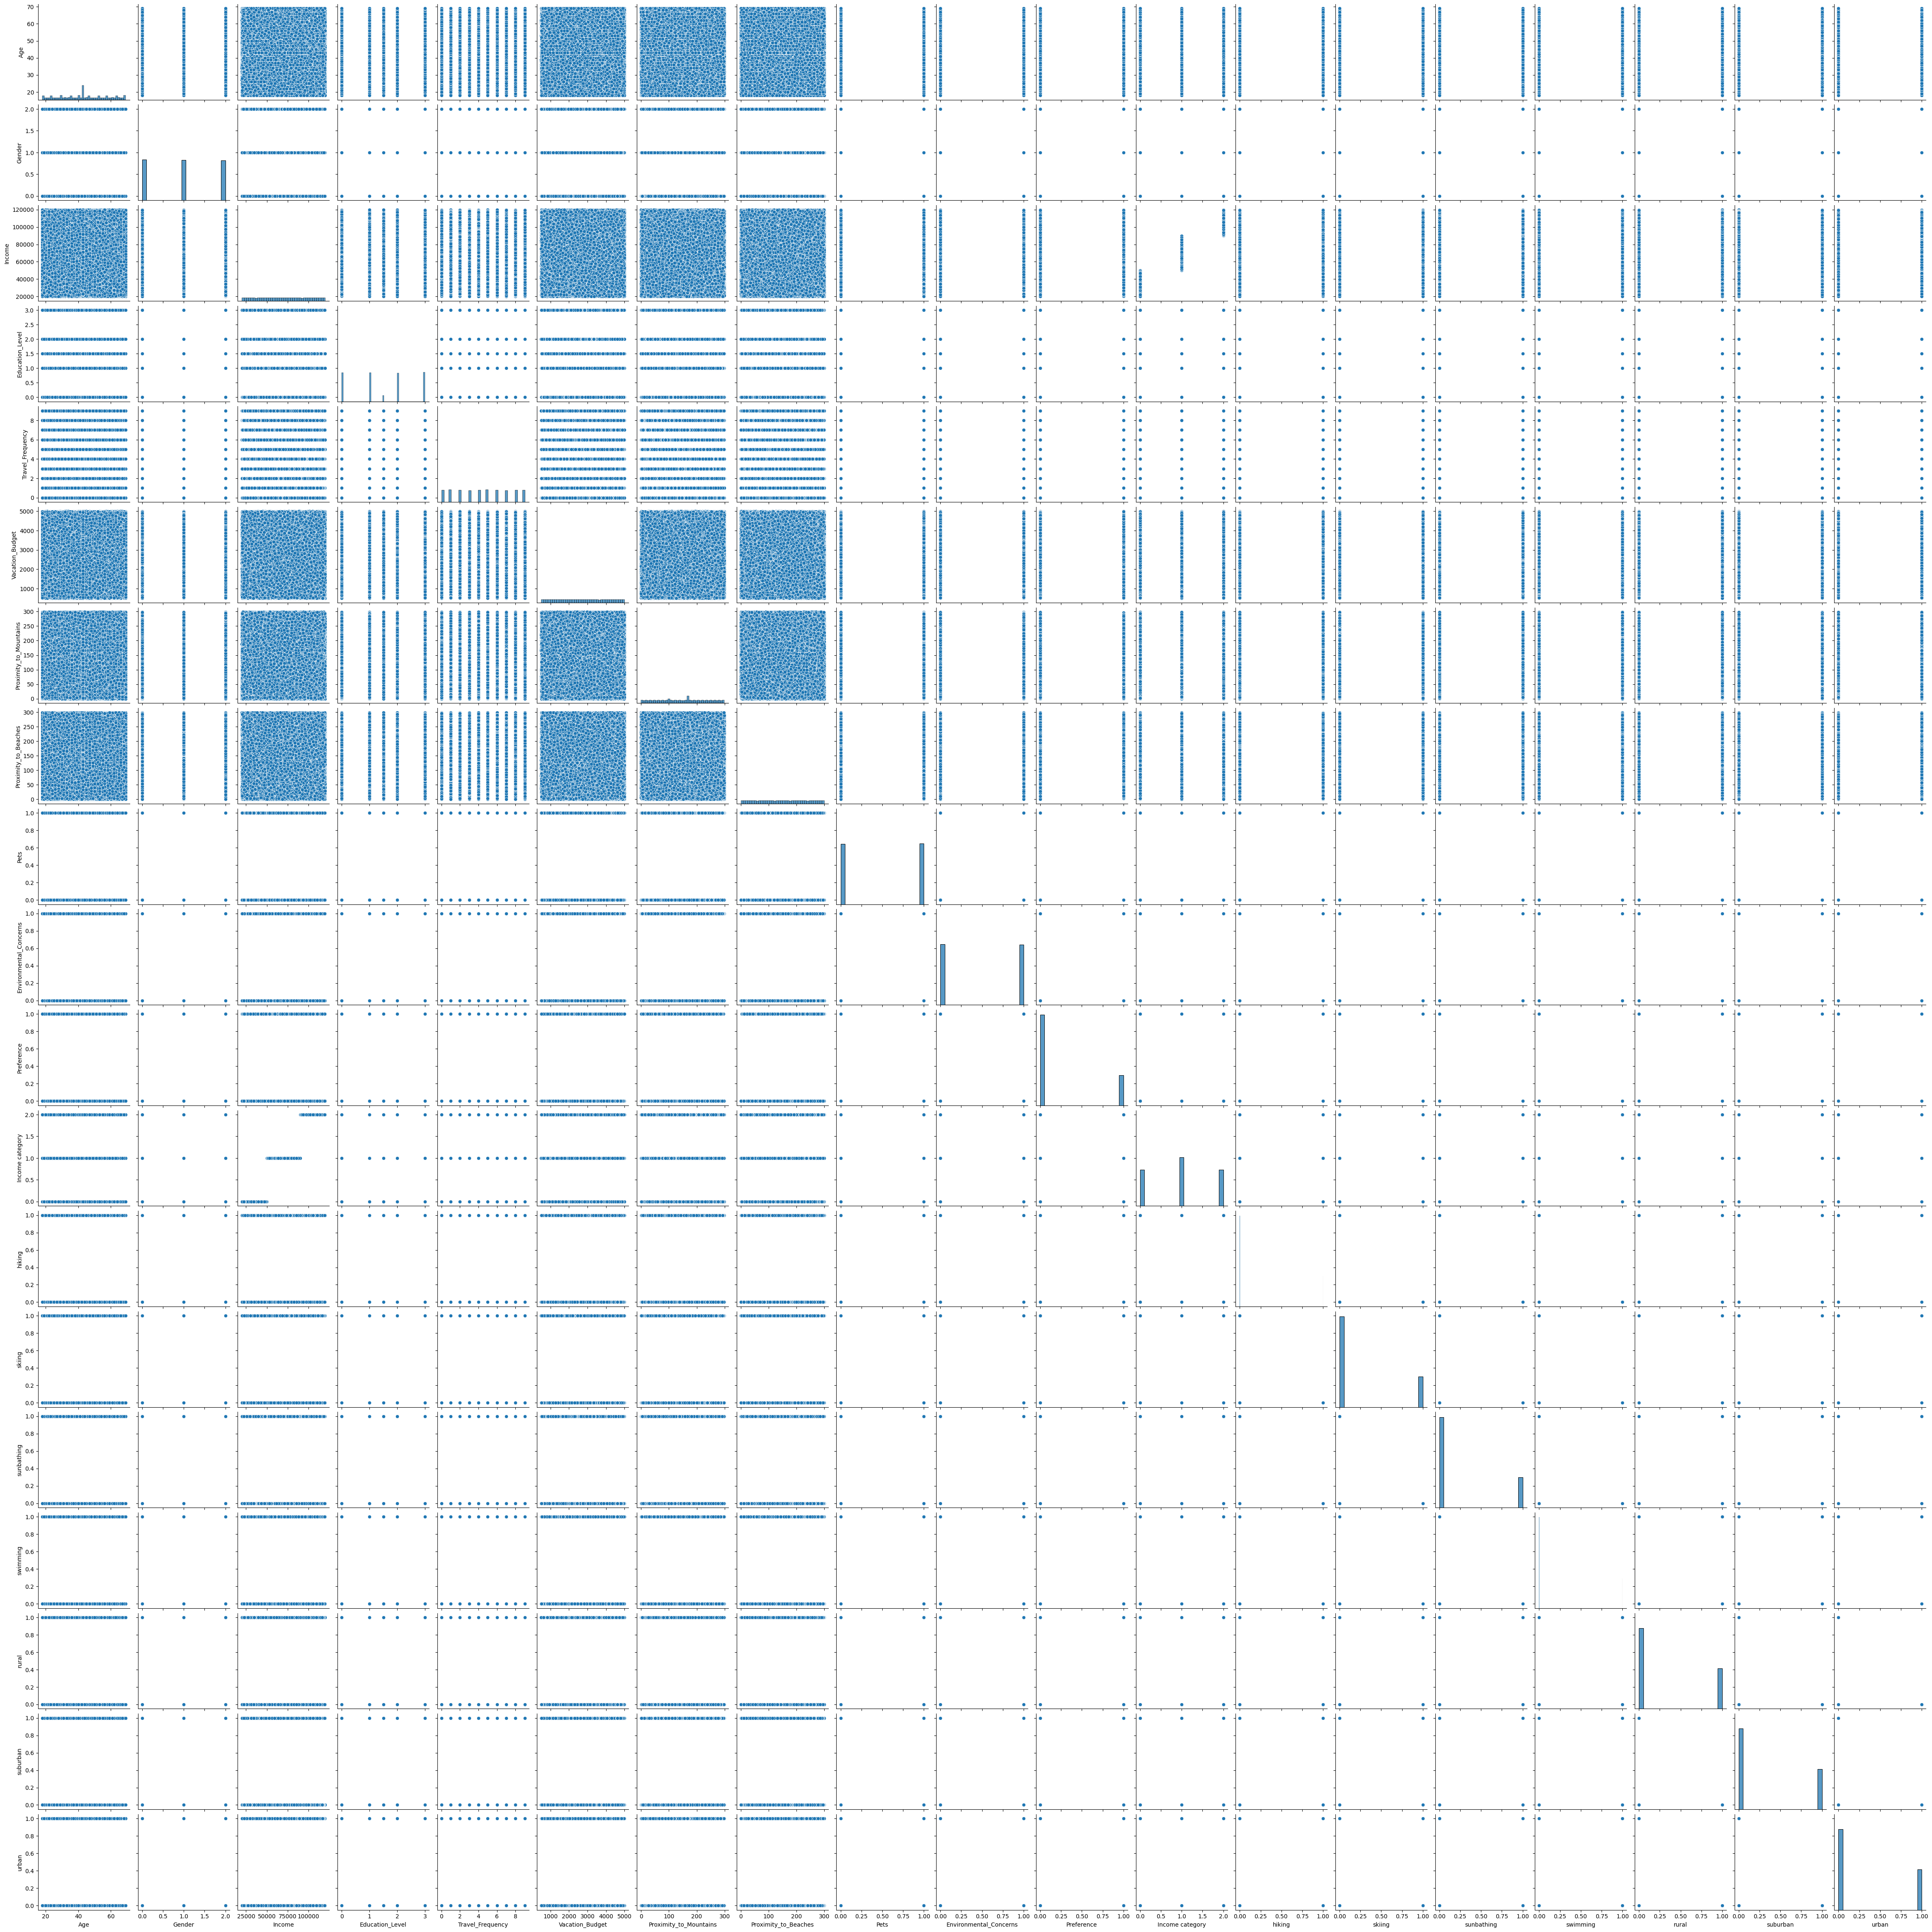

In [177]:
sns.pairplot(df)

In [178]:
X, y = df.drop(columns=["Income"]), df["Income"]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [179]:
model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(train_X, train_y)

y_pred = model.predict(test_X)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:46:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


In [180]:
print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, test_y)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred, test_y)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, test_y))))
print("R2 Score:", r2_score(test_y, y_pred))

Mean Absolute Error : 20900.791015625
Mean Squared Error : 579458048.0
Root Mean Squared Error : 24071.934861992293
R2 Score: 0.30003273487091064


In [181]:
#So ovoj dataset mislam deka ne mozat da se dobijat dobri rezultati za income. Datasetot ima slaba korelacija i missing values se teski za impute. Primer za age nema korelacija so nisto ne mozam so mice a nema ni ormalna raspredelba ili left i right skew i ne mozam i so mean ili median, istoto se slucuva i za proximity to mountains 

In [182]:
from xgboost import cv, DMatrix

data_dmatrix = DMatrix(data=X, label=y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5,'alpha': 10}

cv_results = cv(dtrain=data_dmatrix, params=params, nfold=2,
                num_boost_round=20, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:225: UserWarning: [20:46:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  return getattr(self.bst, name)(*args, **kwargs)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:231: UserWarning: [20:46:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  self.bst.update(self.dtrain, iteration, fobj)


In [183]:
print((cv_results["test-rmse-mean"]).tail(1))

19    22129.112468
Name: test-rmse-mean, dtype: float64


In [184]:
from xgboost import train

xg_reg = train(params=params, dtrain=data_dmatrix, num_boost_round=10)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:46:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


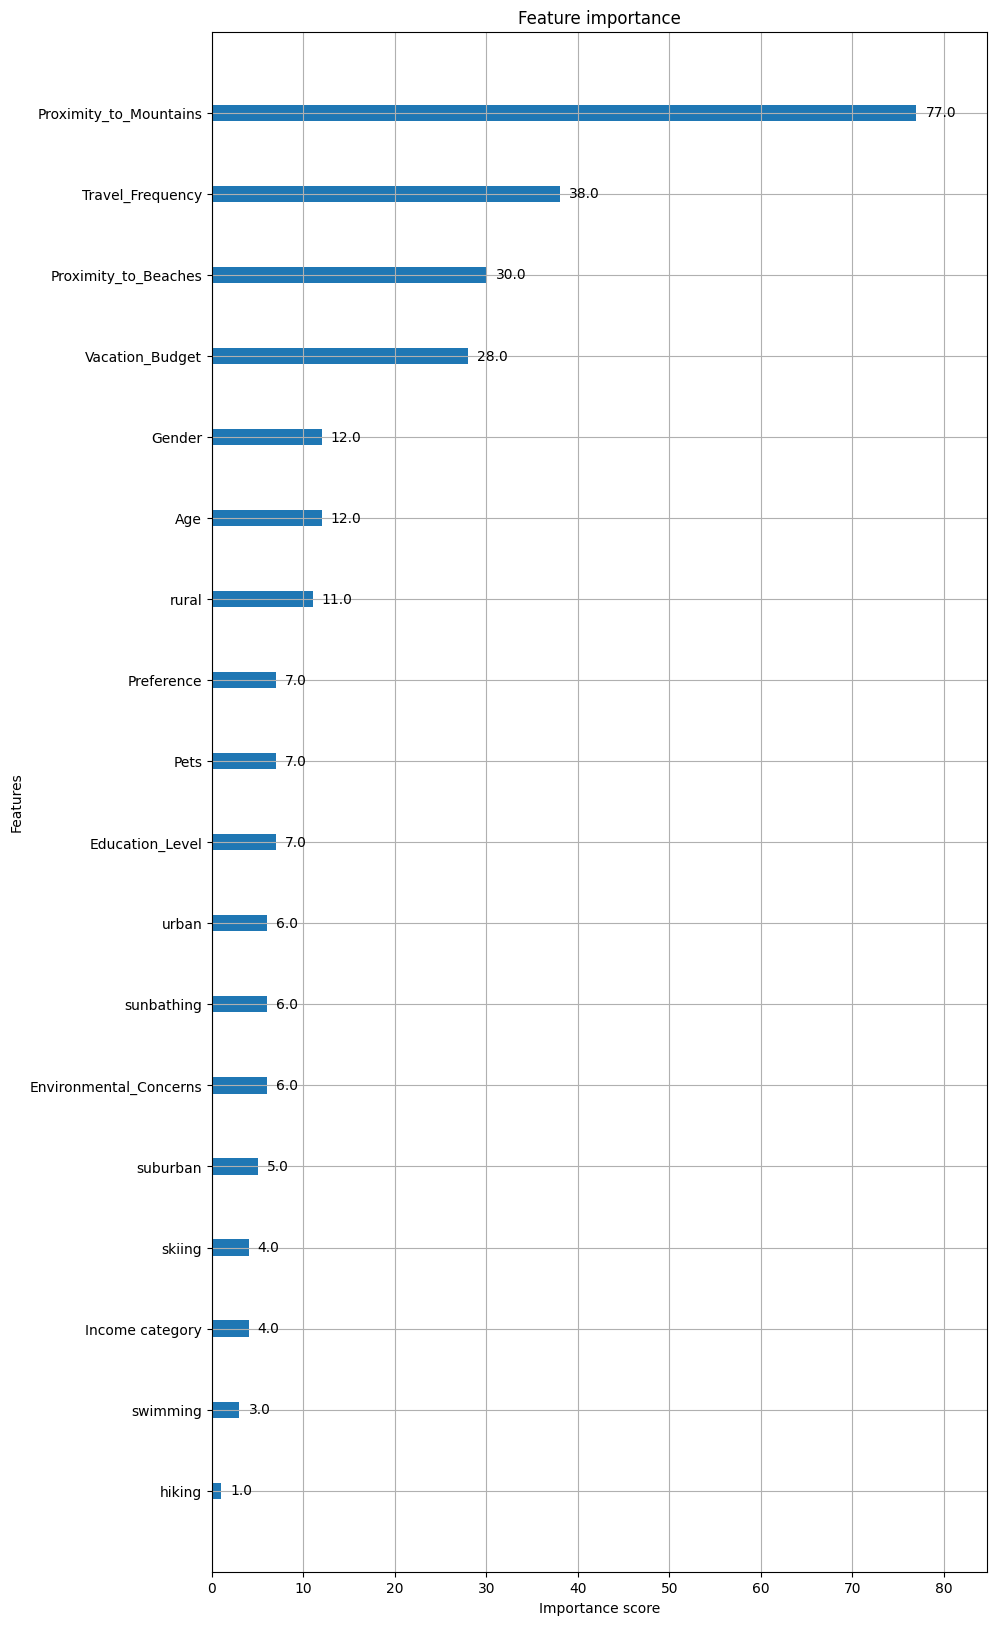

In [185]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 20))
plot_importance(xg_reg, ax=ax)
plt.show()